# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once. It will take a couple of minutes. If the page stops working, reload it and run this cell again.

In [ ]:
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
!wget -q https://www.dropbox.com/s/nnaujcnzdp5y8ua/mip_corpus_search.db.zip?dl=1  -O mip_corpus_search.db.zip
!unzip -o mip_corpus_search.db.zip -d /content/
%run search_utils.py

Archive:  mip_corpus_search.db.zip
  inflating: /content/mip_corpus_search.db  

## Search

Syntax: * means 'any character'

In [27]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "museum is closed" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = True #@param {type:"boolean"}
search_facebook = True #@param {type:"boolean"}
search_twitter = True #@param {type:"boolean"}
begin_date = "2020-11-12" #@param {type:"date"}
end_date = "2020-11-13" #@param {type:"date"}
max_results =  50#@param {type:"integer"}
context_window =  10#@param {type:"integer"}

res_df = run_search(search_string, case_sensitive,
           search_facebook, search_twitter, search_websites, 
           search_website_sentences, begin_date, end_date)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

ok
Date range: 2020-11-12 to 2020-11-13
WEBSITES: no matches found.
FACEBOOK: 1 matches found. Unique museums: 1
TWITTER: 1 matches found. Unique museums: 1
search_regex: '(?i)\bmuseum is closed\b'


res,museum_id,account,before,match,after,msg_time
1,mm.ace.569,MuseumofEnglishRuralLife,hold another of our popular MERL Lates. Although the,Museum is closed,", we're thrilled to say that we've brought the programme",2020-11-12
res,museum_id,account,before,match,after,msg_time
1,mm.domus.NW060,nwmuseum,Team are busy working on the vessels whilst the,museum is closed,. This icebreaker had a very important job to do,2020-11-12


<Figure size 432x288 with 0 Axes>

# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

ok
Search: "museum is closed" • Date range: 2020-11-12 to 2020-11-13 • 
N results: 2 • N unique museums: 2


,platform,n_results,museum_id
0,twitter,1,1
1,facebook,1,1


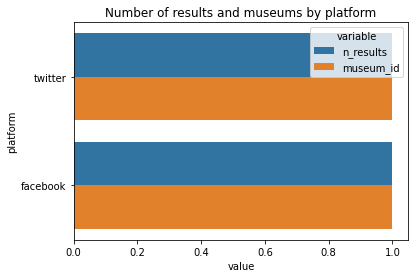

planned (1) festival (1) lates (1) another (1) whilst (1) although (1) collections (1) 
merl (1) hold (1) working (1) human (1) year (1) vessels (1) team (1) 
popular (1) busy (1) 

side (2) boat (2) programme (1) brought (1) rock (1) next (1) days (1) 
online (1) invite (1) would (1) 've (1) night (1) talks (1) 're (1) 
year (1) say (1) important (1) 20 (1) thrilled (1) celebration (1) 

Unique museum results: 2


,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
0,Independent:Not for profit,1,50.0,1534,0.1
1,University,1,50.0,92,1.1


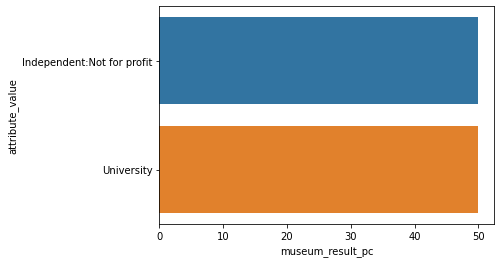

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
2,North West,1,50.0,247,0.4
3,South East,1,50.0,476,0.2


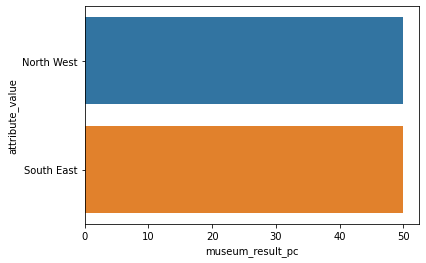

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
4,large,1,50.0,498,0.2
5,medium,1,50.0,865,0.1


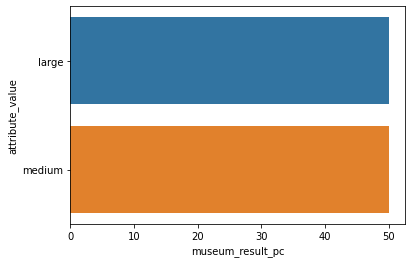

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
6,Rural Industry,1,50.0,111,0.9
7,Transport,1,50.0,224,0.4


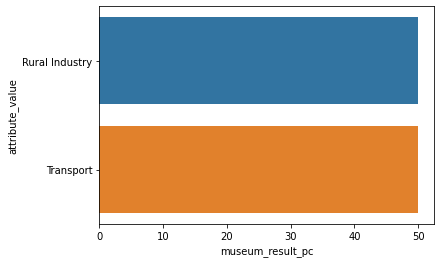

In [28]:
%run search_utils.py
#@title Default title text
token_context_size =  10#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size)
#res_attr_df

### Download results as Excel

In [29]:
# click here to download the complete search results
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [31]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>